In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
data = df.copy() # let's make copy of our original data

In [3]:
# read first 5 rows of data, to see what data contains
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
# size of data
data.shape

(103, 7)

# Step 1: Data Cleaning

In [5]:
# delete unwanted columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)

# now correct numerical syntax
data["Production (Tons)"] = data["Production (Tons)"].str.replace(".","")
data["Production per Person (Kg)"] = data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"] = data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"]= data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\2453035143.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Production (Tons)"] = data["Production (Tons)"].str.replace(".","")
C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\2453035143.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Production per Person (Kg)"] = data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\2453035143.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as liter

In [6]:
# let's quick view above changes
data.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
# rename columns 
data.rename(columns={"Production (Tons)":"Production(Tons)"}, inplace=True)
data.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"}, inplace=True)
data.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"}, inplace=True)
data.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"}, inplace=True)
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
# now check for null values
data.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [9]:
# nan values present in our data
data[data['Acreage(Hectare)'].isnull() | data['Yield(Kg/Hectare)'] .isnull()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


* So there is only one row which contain null values, hence we delete this row using dropna() method.
* But when we drop this row, then it also drop that index and our index like ...,98,100,101,.... ( which lack 99)

In [10]:
data.dropna()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


* So to modify our index we use reset_index() method, who reset our index from 1 to 101. 
* But create new column in our data frame name="index", which contain our privious index values

In [11]:
data.dropna().reset_index()

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,11949.8


* so we delte this "index" column

In [12]:
data.dropna().reset_index().drop("index", axis=1)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [13]:
# then we store this data in our data variable
data = data.dropna().reset_index().drop("index", axis=1)

* Let's see for categorical data

In [14]:
data.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

* now, check column's data type

In [15]:
data.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

* As Production(Tons), Production_per_Person(Kg), Acreage(Hectare), Yield(Kg/Hectare) are floats

In [16]:
data['Production(Tons)'] = data['Production(Tons)'].astype("float")
data['Production_per_Person(Kg)'] = data['Production_per_Person(Kg)'].astype("float")
data['Acreage(Hectare)'] = data['Acreage(Hectare)'].astype("float")
data['Yield(Kg/Hectare)'] = data['Yield(Kg/Hectare)'].astype("float")

In [17]:
data.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

# Step 2: Univariate Analysis

In [18]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcan from each continent?

In [19]:
data['Continent'].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

* plot a bar graph

<Axes: >

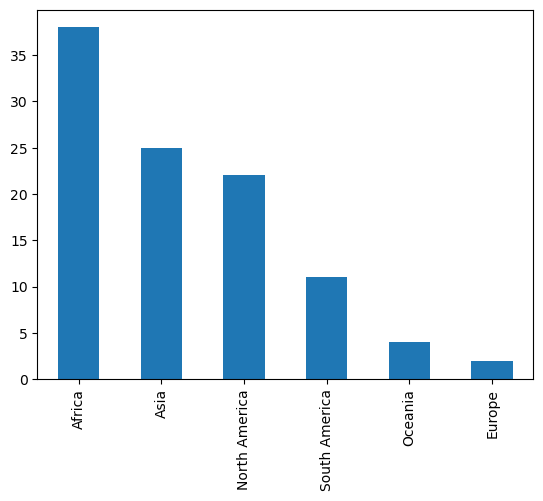

In [20]:
data['Continent'].value_counts().plot(kind='bar')

So Africa has maximum number of countries, which produce sugarcan

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\2073929793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production(Tons)'])
C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\2073929793.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production_per_Per

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

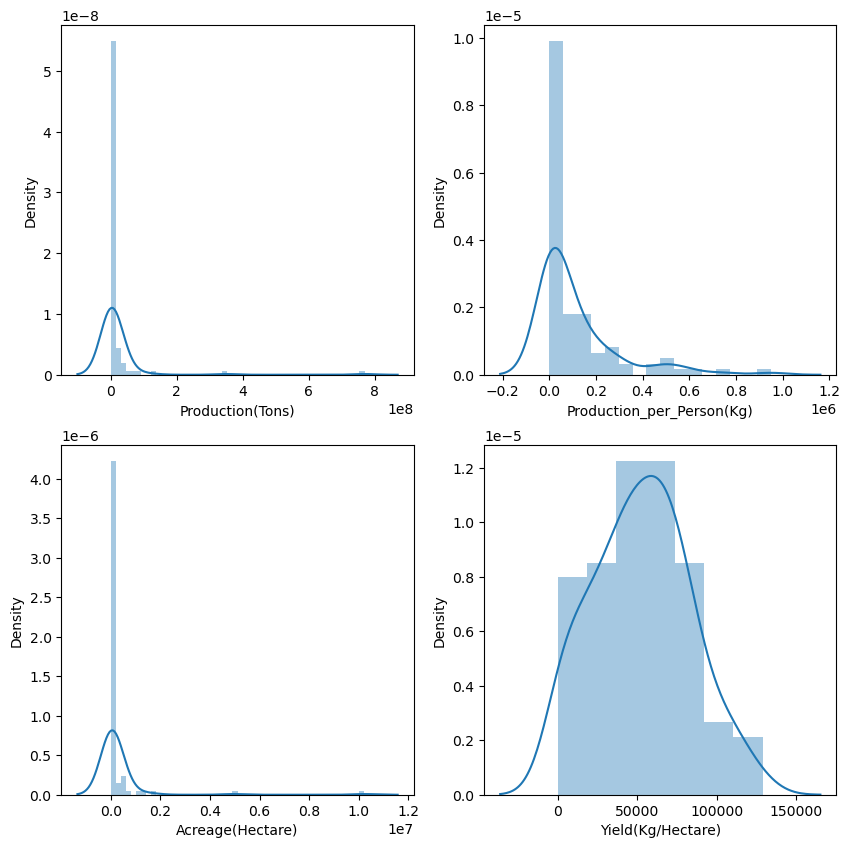

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(data['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(data['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(data['Yield(Kg/Hectare)'])

# Step 3: Checking outliers

<Axes: title={'center': 'Yield(Kg/Hectare)'}>

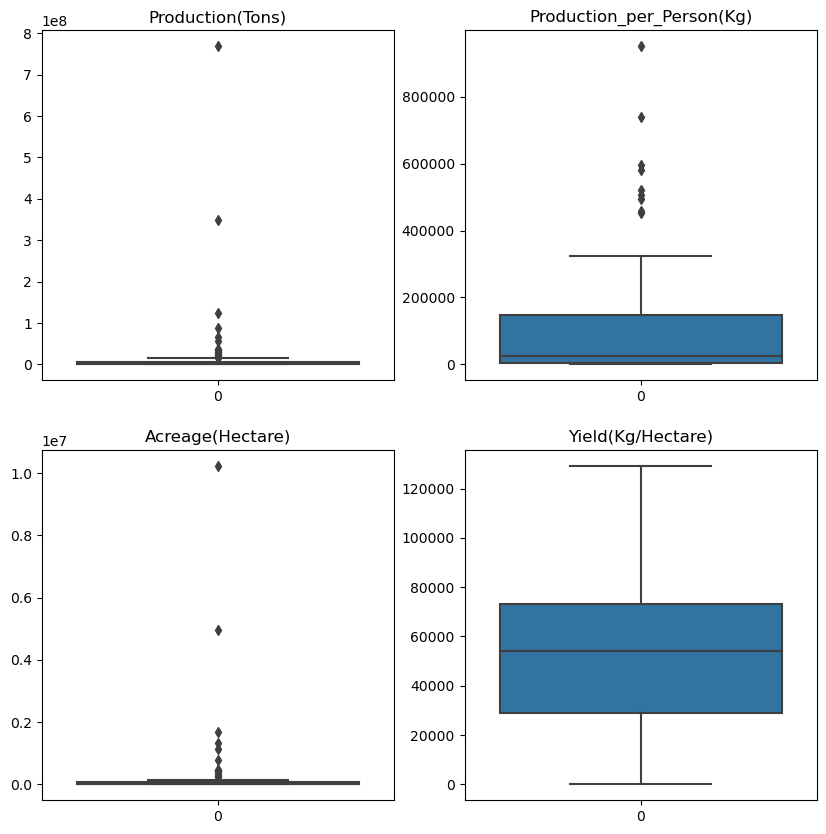

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Production(Tons)')
sns.boxplot(data['Production(Tons)'])

plt.subplot(2,2,2)
plt.title('Production_per_Person(Kg)')
sns.boxplot(data['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
plt.title('Acreage(Hectare)')
sns.boxplot(data['Acreage(Hectare)'])

plt.subplot(2,2,4)
plt.title('Yield(Kg/Hectare)')
sns.boxplot(data['Yield(Kg/Hectare)'])

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. 
And then we can see what are the reasons for outliers

In [23]:
data.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


From data, 
* there are huge difference between 75% and maximum value (except in Yield(Kg/Hectare)).


# Bivariate Analysis

In [24]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produce maximum sugarcan

In [25]:
new_data = data[['Country', 'Production(Tons)']].set_index('Country')

In [26]:
new_data

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [27]:
# I also want percentage, 
new_data['Percentage'] = new_data['Production(Tons)'] / sum(new_data['Production(Tons)']) * 100

In [28]:
new_data

,Production(Tons),Percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


plot a piechart

<Axes: ylabel='Percentage'>

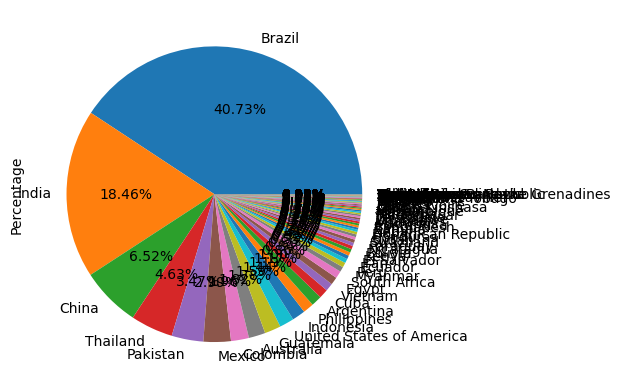

In [29]:
new_data['Percentage'].plot(kind='pie', autopct='%.2f%%')

So we can see that, Braxil, India and China are produce maximum sugarcan.
So, to plot a piechart, we separte other countries from these three to clear view of piechart.

In [30]:
countries = ["Brazil", "India", "China", "Others"]
percentage = []
total = 0
for i in range(len(new_data['Percentage'])):
    if i > 2:
        total += new_data['Percentage'].iloc[i]
    else:
        percentage.append(new_data['Percentage'].iloc[i])
percentage.append(total)

In [31]:
percentage

[40.72728543291318, 18.462001126665914, 6.520137983473038, 34.29057545694786]

([<matplotlib.patches.Wedge at 0x1b131751c60>,
 [Text(0.31592890627174397, 1.0536550318685618, 'Brazil'),
  Text(-1.0999962222756798, 0.002882876902168208, 'India'),
  Text(-0.7802884409959531, -0.7753386027072979, 'China'),
  Text(0.5211078021784741, -0.9687345655589671, 'Others')],
 [Text(0.1723248579664058, 0.5747209264737608, '40.7%'),
  Text(-0.5999979394230981, 0.0015724783102735679, '18.5%'),
  Text(-0.42561187690688346, -0.42291196511307155, '6.5%'),
  Text(0.2842406193700768, -0.5284006721230728, '34.3%')])

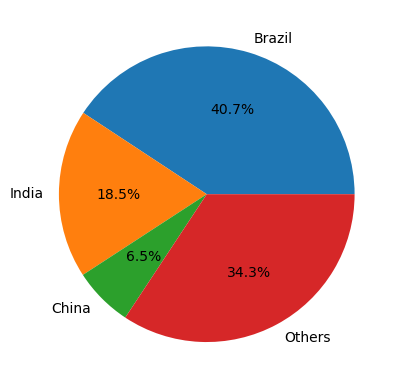

In [32]:
plt.pie(percentage, labels=countries, autopct='%.1f%%')

And Top 10 countries for produce maximum sugarcan

<Axes: xlabel='Country'>

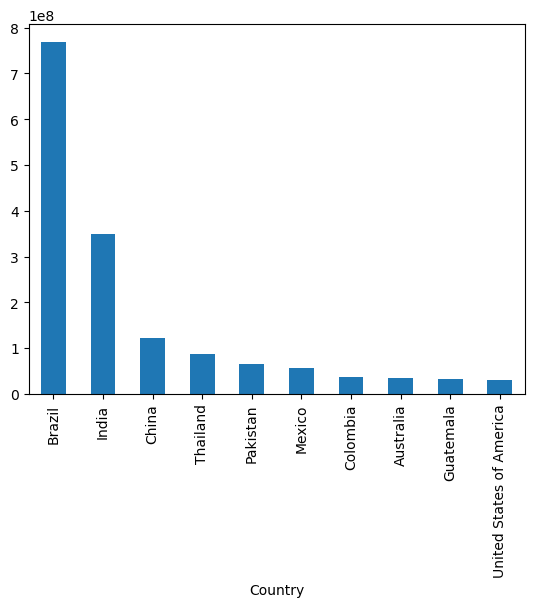

In [33]:
new_data.sort_values(by='Production(Tons)', ascending=False, inplace=True)
new_data['Production(Tons)'].head(10).plot(kind='bar')

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

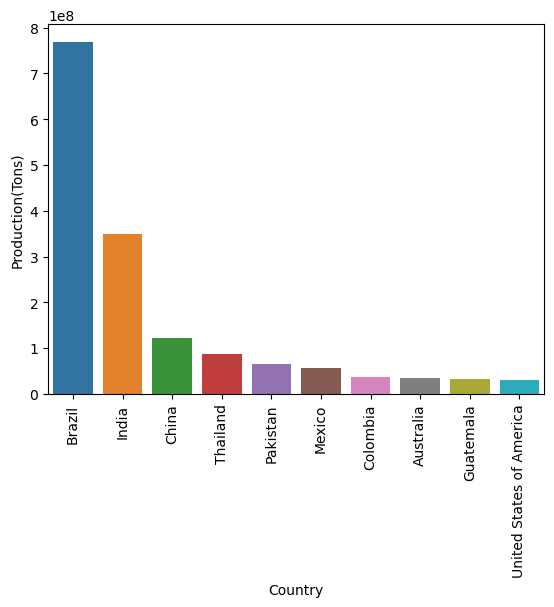

In [34]:
# we can also plot barplot using seaborn
temp_data = data.head(10).sort_values(by='Production(Tons)', ascending=False)
plot = sns.barplot(data = temp_data, x='Country', y='Production(Tons)')
# to rotate x_axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### Which country has highest land?

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

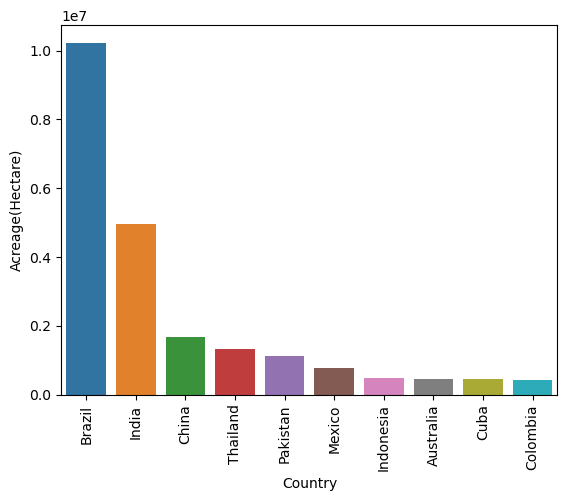

In [35]:
data_acr = data.sort_values(by='Acreage(Hectare)', ascending=False)
plot = sns.barplot(data = data_acr.head(10), x='Country', y='Acreage(Hectare)')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

### Which Country has highest yeild per hacter?

[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

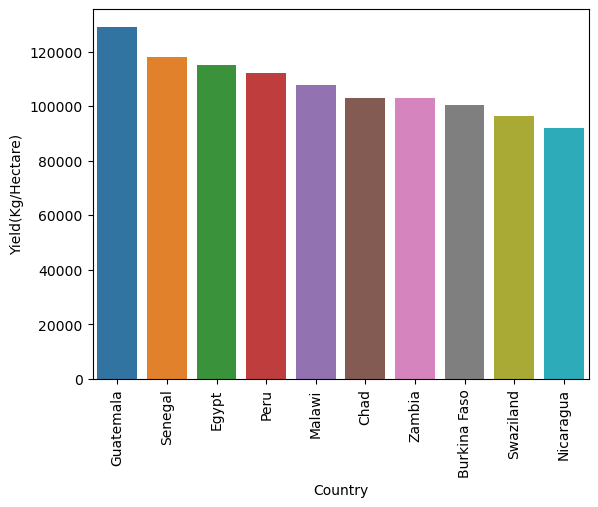

In [36]:
data_yeild = data.sort_values(by='Yield(Kg/Hectare)', ascending=False)
plot = sns.barplot(data=data_yeild.head(10), x='Country', y='Yield(Kg/Hectare)')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### correlation

In [37]:
data.corr()

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\3135167018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Greens')


<Axes: >

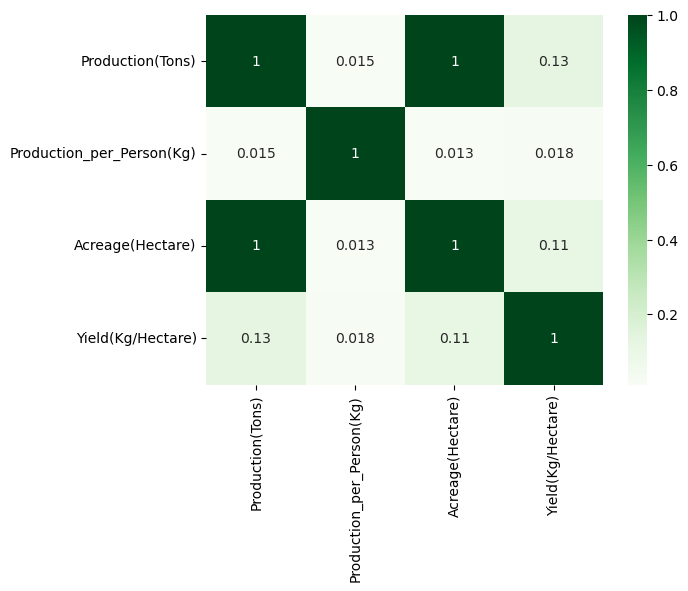

In [39]:
sns.heatmap(data.corr(), annot=True, cmap='Greens')

### Do countries with highest land produce more sugarcane?

We can say yes, from above heatmap.
Or we can also use scatterplot to find relationship between production and land

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

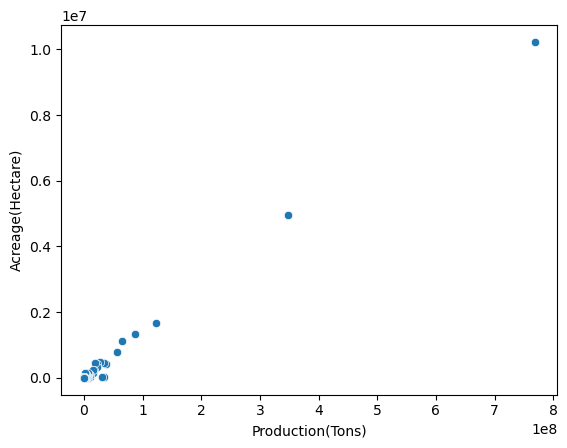

In [42]:
sns.scatterplot(x='Production(Tons)', y='Acreage(Hectare)', data=data)

### Do countries which yeild more sugarcane per hactare produce more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

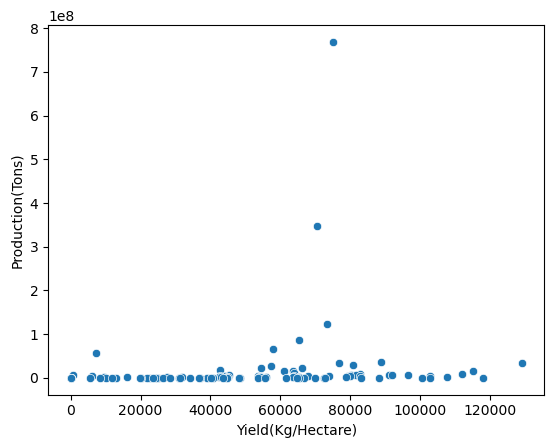

In [43]:
sns.scatterplot(x='Yield(Kg/Hectare)', y='Production(Tons)', data=data)

# Analysis For Continent

In [69]:
data_cont = data.groupby("Continent").sum()
data_cont

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_6524\1720126509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_cont = data.groupby("Continent").sum()


,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


In [75]:
data['Continent'].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

### Which continent produce maximum sugarcane

<Axes: xlabel='Continent'>

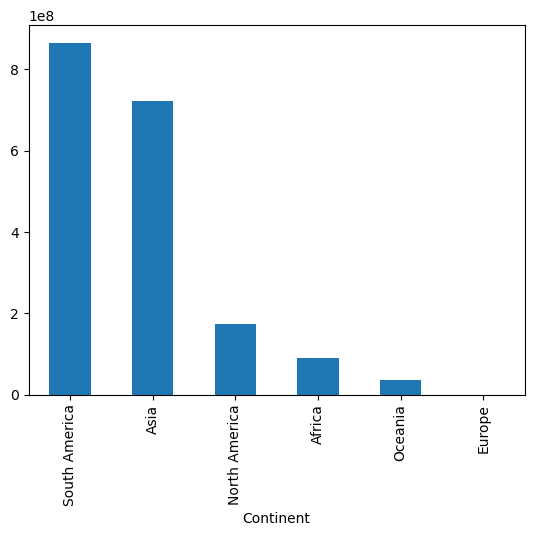

In [73]:
data_cont['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Continent'>

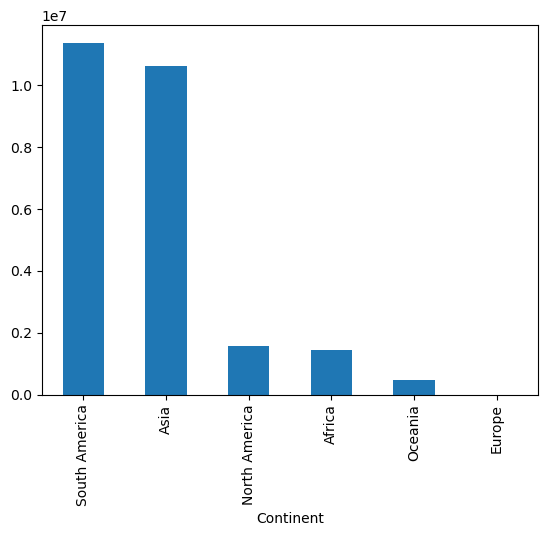

In [74]:
data_cont['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

### Do number of countries in a Continent effects production of sugarcane?

In [81]:
data_cont['number_of_countries'] = data['Continent'].value_counts()

In [82]:
data_cont

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


([<matplotlib.axis.XTick at 0x1b13d4ddb10>,
 [Text(38, 0, 'Africa'),
  Text(25, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(22, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(11, 0, 'South America')])

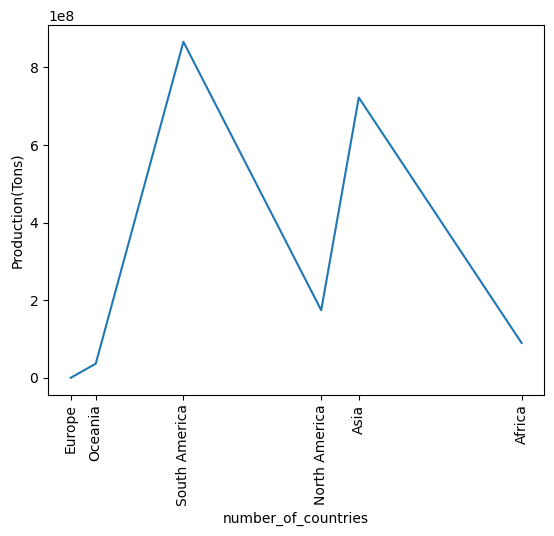

In [85]:
sns.lineplot(x='number_of_countries', y='Production(Tons)', data=data_cont)
# change the continent name instead of its county count value
plt.xticks(data_cont['number_of_countries'], data_cont.index, rotation=90)

### Do countinent with highest land produce more sugarcane?

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

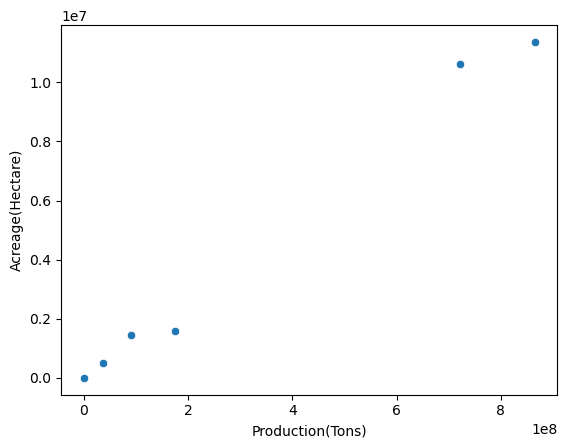

In [87]:
sns.scatterplot(data=data_cont, x='Production(Tons)', y='Acreage(Hectare)')

### Production distribution by continent

<Axes: ylabel='Production(Tons)'>

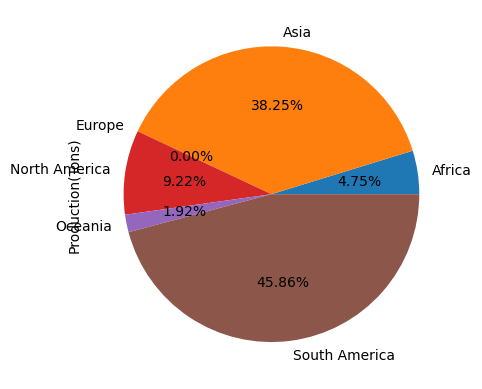

In [90]:
data_cont['Production(Tons)'].plot(kind='pie', autopct='%.2f%%')

### Correlation for continent

In [88]:
data_cont.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

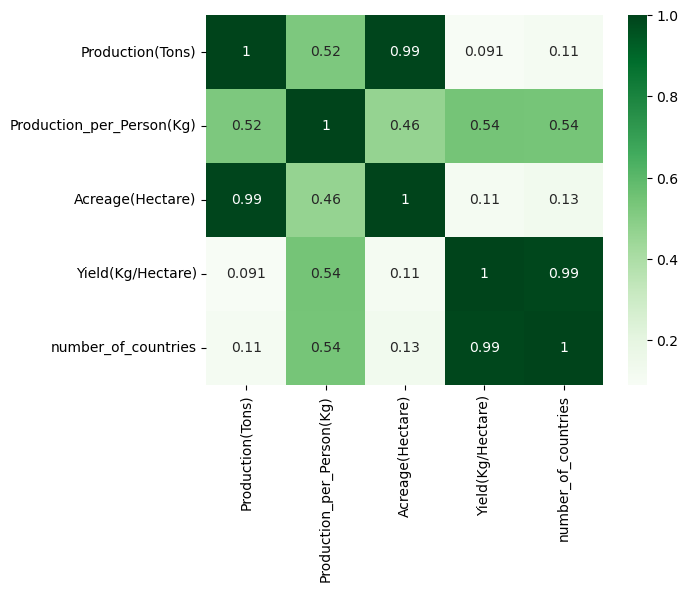

In [89]:
sns.heatmap(data_cont.corr(), annot=True, cmap='Greens')